In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
tf.test.is_gpu_available()

True

### Data Loading

In [3]:
data = pd.read_csv('../../Resources/data/text_summarization/fine_foods_reviews.csv')
data = data.sample(200000)
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
156728,156729,B000UXBOOI,A2ESR2RFX9EVM6,"Robert Ferguson ""Bob""",0,1,4,1317859200,Rice Crackers - Good,I had a few of these on a road trip with a fri...
265199,265200,B001W3OR1W,A1SHTWE21VLJQP,C. Bedell,0,0,5,1252627200,Almost as good as tootsie rolls,I was diagnosed with Type 2 diabetes last year...
227190,227191,B002QZ5Z16,AXHAC0QW02M9N,Neil,0,0,5,1287792000,Fingerlicking good!!!,Had been looking for this pita for a while and...
344436,344437,B0026KNQSA,AVABPJCKE2MR5,spal,0,0,4,1314921600,Popchips Jalapeno flavor,I bought a case of jalapeno chips as I love th...
59239,59240,B0012KH06E,ACSFLABBSAP36,IAN P ONEAL,0,0,1,1318982400,Cheaper on petco's site,"only $13.29 a case on the petco site (Oct 20, ..."


In [4]:
data.shape

(200000, 10)

In [5]:
data.dropna(axis=0, inplace=True)
data.drop_duplicates(subset=['Text'], inplace=True)

In [6]:
data.shape ## Shape after dropping duplicates and NA

(161180, 10)

In [7]:
## Removing all datapoints from sampled data that are below a certain length
data = data[data['Text'].str.split().apply(len) < 35]

In [8]:
data.shape

(42070, 10)

### Cleaning

In [9]:
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [20]:
import re
def clean(text, contractions=contractions_dict, remove_stop=False):
    text = text.lower()
    text = re.sub(r'\([^)]*\)', '', text)
    text = ' '.join([contractions[t] if t in contractions else t for t in text.split(' ')])
    text = re.sub(r"'s\b", "", text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub('[m]{2, }', 'mm', text)
    
    return ' '.join(text.strip().split())

In [21]:
clean("this ain't it, chief!")

'this am not it chief'

In [22]:
reviews = pd.DataFrame()
reviews['text'] = data['Text'].apply(clean)
reviews['summary'] = data['Summary'].apply(clean)

reviews.head()

,text,summary
227190,had been looking for this pita for a while and...,fingerlicking good
59239,only a case on the petco site not worth the ce...,cheaper on petco site
357229,if you are looking for something natural to re...,great for hot flashes
191682,it is a great thing we are using it since we g...,yogurt
348190,this food is the best our golden retriever who...,itchy scratchy golden retriever no more


In [23]:
reviews['summary'] = reviews['summary'].apply(lambda x: 'sostok ' + x + ' eostok')
reviews.head()

,text,summary
227190,had been looking for this pita for a while and...,sostok fingerlicking good eostok
59239,only a case on the petco site not worth the ce...,sostok cheaper on petco site eostok
357229,if you are looking for something natural to re...,sostok great for hot flashes eostok
191682,it is a great thing we are using it since we g...,sostok yogurt eostok
348190,this food is the best our golden retriever who...,sostok itchy scratchy golden retriever no more...


In [24]:
for i in range(5):
    print('* Review: ', reviews['text'].iloc[i])
    print('* Summary: ', reviews['summary'].iloc[i])
    print('** ---- ** ---- **\n')

* Review:  had been looking for this pita for a while and found it online ordering was the best thing i ever did
* Summary:  sostok fingerlicking good eostok
** ---- ** ---- **

* Review:  only a case on the petco site not worth the cents a can they are charging here
* Summary:  sostok cheaper on petco site eostok
** ---- ** ---- **

* Review:  if you are looking for something natural to relieve hot flashes sage tea will do it a glass in the morning and one at night and wow what a difference it made
* Summary:  sostok great for hot flashes eostok
** ---- ** ---- **

* Review:  it is a great thing we are using it since we got it and every newone is better and better thanks
* Summary:  sostok yogurt eostok
** ---- ** ---- **

* Review:  this food is the best our golden retriever who is prone to all sorts of allergies is scratch free with this food thanks amazon for making it so easy to order online
* Summary:  sostok itchy scratchy golden retriever no more eostok
** ---- ** ---- **



### Preprocessing

In [25]:
lengths = pd.DataFrame()
lengths['text'] = [len(i.split()) for i in reviews['text']]
lengths['summary'] = [len(i.split()) for i in reviews['summary']]

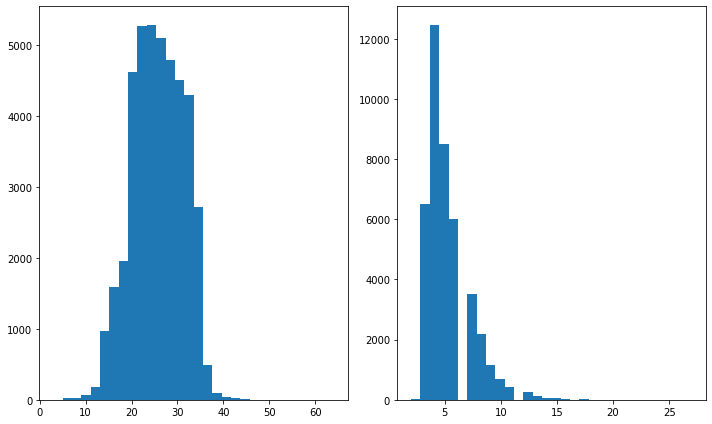

In [26]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(lengths['text'], bins=30)
plt.subplot(1, 2, 2)
plt.hist(lengths['summary'], bins=30)
plt.tight_layout()

In [27]:
lengths.describe()

,text,summary
count,42070.000000,42070.000000
mean,25.919990,5.231828
std,5.451605,2.038471
min,3.000000,2.000000
25%,22.000000,4.000000
50%,26.000000,5.000000
75%,30.000000,6.000000
max,64.000000,27.000000


In [28]:
text_len = int(lengths['text'].max())
summary_len = int(lengths['summary'].quantile(q=0.75))

text_len, summary_len

(64, 6)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(reviews['text'], reviews['summary'], test_size=0.1, shuffle=True)

X_train.shape, X_test.shape

((37863,), (4207,))

In [ ]:
X_tokenizer = tf.keras.preprocessing.text.Tokenizer()
X_tokenizer.fit_on_texts(reviews['text'])

y_tokenizer = tf.keras.preprocessing.text.Tokenizer()
y_tokenizer.fit_on_texts(reviews['summary'])

In [ ]:
y_tokenizer.word_index['sostok']

In [111]:
X_train = X_tokenizer.texts_to_sequences(X_train)
X_test = X_tokenizer.texts_to_sequences(X_test)

y_train = y_tokenizer.texts_to_sequences(y_train)
y_test = y_tokenizer.texts_to_sequences(y_test)

In [112]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=text_len, padding='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=text_len, padding='post')

y_train = tf.keras.preprocessing.sequence.pad_sequences(y_train, maxlen=summary_len, padding='post')
y_test = tf.keras.preprocessing.sequence.pad_sequences(y_test, maxlen=summary_len, padding='post')

In [113]:
%%time
glove_embeddings = np.load('../../Resources/glove.840B.300d.pkl', allow_pickle=True)

Wall time: 36.2 s


In [114]:
def map_embeddings(emb_index, tokenizer=X_tokenizer, latent_dim=300):
    emb_matrix = np.zeros((len(tokenizer.word_index)+1, latent_dim), dtype='float32')
    
    for word, i in tokenizer.word_index.items():
        emb_vector = emb_index.get(word)
        if emb_vector is not None:
            emb_matrix[i] = emb_vector
    return emb_matrix

In [115]:
text_embeddings = map_embeddings(glove_embeddings)
summary_embeddings = map_embeddings(glove_embeddings, tokenizer=y_tokenizer)

text_embeddings.shape, summary_embeddings.shape

((20906, 300), (9574, 300))

In [116]:
del glove_embeddings

### Summarization with Attention

In [117]:
latent_dim = 500

In [118]:
from attention_keras.layers.attention import AttentionLayer

In [119]:
## ENCODER
encoder_inputs = tf.keras.layers.Input(shape=(text_len, ), name='encoder_inputs')
X_embeddings = tf.keras.layers.Embedding(len(X_tokenizer.word_index)+1, 300, 
                                              trainable=False, weights=[text_embeddings],
                                              name='text_embeddings')
encoder_embeddings = X_embeddings(encoder_inputs)

## LSTM - 1
encoder_lstm1 = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True, name='encoder_lstm1')
encoder_output1, state_h1, state_c1 = encoder_lstm1(encoder_embeddings)

## LSTM - 2
encoder_lstm2 = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True, name='encoder_lstm2')
encoder_outputs, state_h, state_c = encoder_lstm2(encoder_embeddings)



## DECODER
decoder_inputs = tf.keras.layers.Input(shape=(None, ), name='decoder_inputs')
y_embeddings = tf.keras.layers.Embedding(len(y_tokenizer.word_index)+1, 300, 
                                              trainable=False, weights=[summary_embeddings], 
                                              name='summary_embeddings')
decoder_embeddings = y_embeddings(decoder_inputs)

## Decoder LSTM using encoder_states as initial states
decoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True, name='decoder_lstm')
decoder_outputs, decoder_fwd_state, decoder_back_state = decoder_lstm(decoder_embeddings, initial_state=[state_h, state_c])


## ATTENTION
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])


## CONCAT
decoder_concat = tf.keras.layers.Concatenate(axis=-1, name='concat_layer') ([decoder_outputs, attn_out])

## DENSE
decoder_dense = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(len(y_tokenizer.word_index)+1, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat)


## MODEL
model = tf.keras.models.Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_inputs (InputLayer)     [(None, 63)]         0                                            
__________________________________________________________________________________________________
decoder_inputs (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
text_embeddings (Embedding)     (None, 63, 300)      6271800     encoder_inputs[0][0]             
__________________________________________________________________________________________________
summary_embeddings (Embedding)  (None, None, 300)    2872200     decoder_inputs[0][0]             
____________________________________________________________________________________________

In [120]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [121]:
import os
model_name = 'init_summarizer.h5'
model_path = '../../Resources/models/document_summarization/'

final_savepath = os.path.join(model_path, model_name)
final_savepath

'../../Resources/models/document_summarization/init_summarizer.h5'

In [122]:
cbks = [
    tf.keras.callbacks.ModelCheckpoint(final_savepath),
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
]

In [182]:
## Trained it for around 23 epochs, the params here say 1 but there were ~21 more 

model.fit([X_train, y_train[:, :-1]], y_train.reshape(y_train.shape[0], y_train.shape[1], 1)[:, 1:],
          epochs=1, batch_size=64, callbacks=cbks)

Train on 37962 samples
37962/37962 [==============================] - 654s 17ms/sample - loss: 0.1975


### Predictions

In [183]:
encoder_model = tf.keras.models.Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])


## Tensors to hold states of prev timestep
decoder_state_input_h = tf.keras.layers.Input(shape=(latent_dim, ))
decoder_state_input_c = tf.keras.layers.Input(shape=(latent_dim, ))
decoder_hidden_state_input = tf.keras.layers.Input(shape=(text_len, latent_dim))

## Get embeddings of decoder sequence
decoder_embeddings_2 = y_embeddings(decoder_inputs)

## Set the initial states to the states of the prev timestep
decoder_outputs2, state_h2, state_c2 = decoder_lstm(decoder_embeddings_2, initial_state=[decoder_state_input_h, decoder_state_input_c])

## Attention inference
attention_inference, attention_inference_states = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inference_concat = tf.keras.layers.Concatenate(axis=-1, name='concat')([decoder_outputs2, attention_inference])

## Softmax for prob dist
decoder_outputs2 = decoder_dense(decoder_inference_concat)

## Final decoder
decoder_model = tf.keras.models.Model([decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
                                      [decoder_outputs2] + [state_h2, state_c2])


decoder_model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
decoder_inputs (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
summary_embeddings (Embedding)  (None, None, 300)    2872200     decoder_inputs[0][0]             
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 500)]        0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 500)]        0                                            
___________________________________________________________________________________________

In [184]:
y_tokenizer.index_word[0] = '<pad>'

In [185]:
def decode_sequence(input_seq):
    
    ## Encode the inputs
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    ## Initialize an empty target seq of len 1
    target_seq = np.zeros((1, 1))
    
    ## Set the first word of target sequence as index of sostok
    target_seq[0, 0] = y_tokenizer.word_index['sostok']
    
    stop_condition = False
    decoded_sequence = ''
    
    ## Loop to predict the remaining sequence
    while not stop_condition:
        
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        
        ## Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = y_tokenizer.index_word[sampled_token_index]
#         print(sampled_token)
        
        if sampled_token != 'eostok':
            decoded_sequence += ' ' + sampled_token
            
        ## Stop condition check - if eostok is predicted of max len is reached
        if sampled_token == 'eostok' or len(decoded_sequence.split()) >= (summary_len - 1):
            stop_condition = True
            
        ## Update target sequence with currently predicted token index for next loop
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index
        
        ## Update transformer states
        e_h, e_c = h, c
        
    return decoded_sequence

In [186]:
def seq2summary(input_seq, y_tokenizer=y_tokenizer):
    text = ''
    
    for i in input_seq:
        if i != 0 and i != y_tokenizer.word_index['sostok'] and i != y_tokenizer.word_index['eostok']:
            text = text + y_tokenizer.index_word[i] + ' '
            
    return text

In [187]:
def seq2text(input_seq, y_tokenizer=y_tokenizer):
    text = ''
    
    for i in input_seq:
        if i != 0:
            text = text + y_tokenizer.index_word[i] + ' '
    
    return text

### Summarization

In [192]:
for i in range(10, 15):
    print('* Review: {}\n'.format(seq2text(X_test[i])))
    print('* Original Summary: {}\n'.format(seq2summary(y_test[i])))
    print('* Predicted Summary: {}\n'.format(decode_sequence(X_test[i].reshape(1, text_len))))

* Review: eostok people but sostok poor is coffee taste missing great good taste jerkey orange variety fire tasty eostok drink and sampler good always 

* Original Summary: awful 

* Predicted Summary:  not very good

* Review: eostok gift my not it stops great pasta water flavor i super came great love disappointed tomatoes the product big not much yuck do jack 

* Original Summary: great gift 

* Predicted Summary:  great chocolates

* Review: it was than coffee cereal sostok teeth wife tea carb great lovely excellent sostok horrible everyday great plant workday not addicted eostok but sostok loves rich pear w burgers 

* Original Summary: my dog loves this food 

* Predicted Summary:  tasty and chewy

* Review: coffee goodness best and candy pretty is rice nice yum mix eostok know love described powder treat chips delicious excellent flavored nice 

* Original Summary: awesome for breakfast 

* Predicted Summary:  good value

* Review: of coffee find priced gift good not it noodles 

In [224]:
def summarize(input_seq, X_tokenizer=X_tokenizer):
    input_seq = clean(input_seq)
    input_seq = [input_seq]
    input_seq = X_tokenizer.texts_to_sequences(input_seq)
    input_seq = tf.keras.preprocessing.sequence.pad_sequences(input_seq, maxlen=text_len, padding='post')
    
    return decode_sequence(input_seq.reshape(1, -1))

In [228]:
input_seq = "it isn't that great, it causes problems sometimes, but for the money it charges, i can't complain"
summarize(input_seq)

' it works'

### It takes quite a while to train it, even with a subset of the data. If data size is increased and more training time is allocated, the performanace can be improved.